In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file = r"C:\Users\aleksandrov.vd\Documents\Дашборд\графики на старом сайте\Витрина 4\report-2023-6-5.xlsx"
df =  pd.read_excel(file, index_col=0)
df = df.reset_index() 
df

,"ПЭК, т\год","ДПНВОС, т\год",Отчетный год,Класс опасности ЗВ,Наименование ЗВ,Код ОНВОС
0,411413.342392,822826.684784,2021,4.0,"Углеводороды предельные C1 - C5 (алканы, исклю...",03-0123-001907-П
1,406065.283500,812130.567000,2020,NaN,Сухой остаток,57-0159-002123-П
2,248024.421600,496048.843200,2020,NaN,Сухой остаток,80-0102-000139-П
3,248024.421600,496048.843200,2020,NaN,Сухой остаток,80-0102-000138-П
4,241492.880017,482985.760033,2022,4.0,Углерод оксид,61-0162-000059-П
...,...,...,...,...,...,...
33370,500.319922,1000.639843,2020,4.0,Взвешенные частицы РМ2.5,01-0222-003997-П
33371,500.319922,1000.639843,2020,4.0,Взвешенные частицы РМ2.5,01-0222-003981-П
33372,500.319922,1000.639843,2020,4.0,Взвешенные частицы РМ2.5,01-0222-003971-П
33373,500.190488,1000.380976,2021,4.0,Углерод оксид,71-0186-000505-П


In [3]:
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# чтение данных


# shape and data types of the data
print(df.shape)
print(df.dtypes)

# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(33375, 6)
ПЭК, т\год            float64
ДПНВОС, т\год         float64
Отчетный год            int64
Класс опасности ЗВ    float64
Наименование ЗВ        object
Код ОНВОС              object
dtype: object
['ПЭК, т\\год' 'ДПНВОС, т\\год' 'Отчетный год' 'Класс опасности ЗВ']
['Наименование ЗВ' 'Код ОНВОС']


In [4]:
df.describe()

,"ПЭК, т\год","ДПНВОС, т\год",Отчетный год,Класс опасности ЗВ
count,33375.000000,33375.000000,33375.000000,29593.000000
mean,2702.365822,5404.731645,2020.682067,2.506370
std,7828.500688,15657.001377,0.652597,1.595808
min,500.032530,1000.065059,2020.000000,0.000000
25%,735.897543,1471.795085,2020.000000,0.000000
50%,1207.252372,2414.504743,2021.000000,3.000000
75%,2400.959184,4801.918367,2021.000000,4.000000
max,411413.342392,822826.684784,2022.000000,4.000000


In [5]:
df.nunique()

ПЭК, т\год             4540
ДПНВОС, т\год          4540
Отчетный год              3
Класс опасности ЗВ        4
Наименование ЗВ          67
Код ОНВОС             11938
dtype: int64

In [6]:
df.head()

,"ПЭК, т\год","ДПНВОС, т\год",Отчетный год,Класс опасности ЗВ,Наименование ЗВ,Код ОНВОС
0,411413.342392,822826.684784,2021,4.0,"Углеводороды предельные C1 - C5 (алканы, исклю...",03-0123-001907-П
1,406065.283500,812130.567000,2020,NaN,Сухой остаток,57-0159-002123-П
2,248024.421600,496048.843200,2020,NaN,Сухой остаток,80-0102-000139-П
3,248024.421600,496048.843200,2020,NaN,Сухой остаток,80-0102-000138-П
4,241492.880017,482985.760033,2022,4.0,Углерод оксид,61-0162-000059-П


In [7]:
dfclass = df[["Отчетный год", "Класс опасности ЗВ", "ДПНВОС, т\год", "ПЭК, т\год"]]
dfclass.groupby(["Отчетный год", "Класс опасности ЗВ"]).agg("count") 

ДПНВОС, т\год  ПЭК, т\год
Отчетный год Класс опасности ЗВ                           
2020         0.0                          3264        3264
             2.0                            41          41
             3.0                          5046        5046
             4.0                          4101        4101
2021         0.0                          3855        3855
             2.0                            25          25
             3.0                          5551        5551
             4.0                          4528        4528
2022         0.0                           967         967
             2.0                             7           7
             3.0                          1114        1114
             4.0                          1094        1094

In [16]:
data  = dfclass.groupby(["Отчетный год", "Класс опасности ЗВ"]).agg("sum") 
data = data.reset_index()
data.head(15)


,Отчетный год,Класс опасности ЗВ,"ДПНВОС, т\год","ПЭК, т\год"
0,2020,0.0,2.243402e+07,1.121701e+07
1,2020,2.0,1.252291e+06,6.261453e+05
2,2020,3.0,1.858055e+07,9.290276e+06
3,2020,4.0,1.984778e+07,9.923891e+06
4,2021,0.0,2.568261e+07,1.284130e+07
5,2021,2.0,6.350452e+04,3.175226e+04
6,2021,3.0,1.968203e+07,9.841017e+06
7,2021,4.0,2.112778e+07,1.056389e+07
8,2022,0.0,9.401546e+06,4.700773e+06
9,2022,2.0,1.269144e+04,6.345721e+03


In [17]:
data

,Отчетный год,Класс опасности ЗВ,"ДПНВОС, т\год","ПЭК, т\год"
0,2020,0.0,2.243402e+07,1.121701e+07
1,2020,2.0,1.252291e+06,6.261453e+05
2,2020,3.0,1.858055e+07,9.290276e+06
3,2020,4.0,1.984778e+07,9.923891e+06
4,2021,0.0,2.568261e+07,1.284130e+07
5,2021,2.0,6.350452e+04,3.175226e+04
6,2021,3.0,1.968203e+07,9.841017e+06
7,2021,4.0,2.112778e+07,1.056389e+07
8,2022,0.0,9.401546e+06,4.700773e+06
9,2022,2.0,1.269144e+04,6.345721e+03


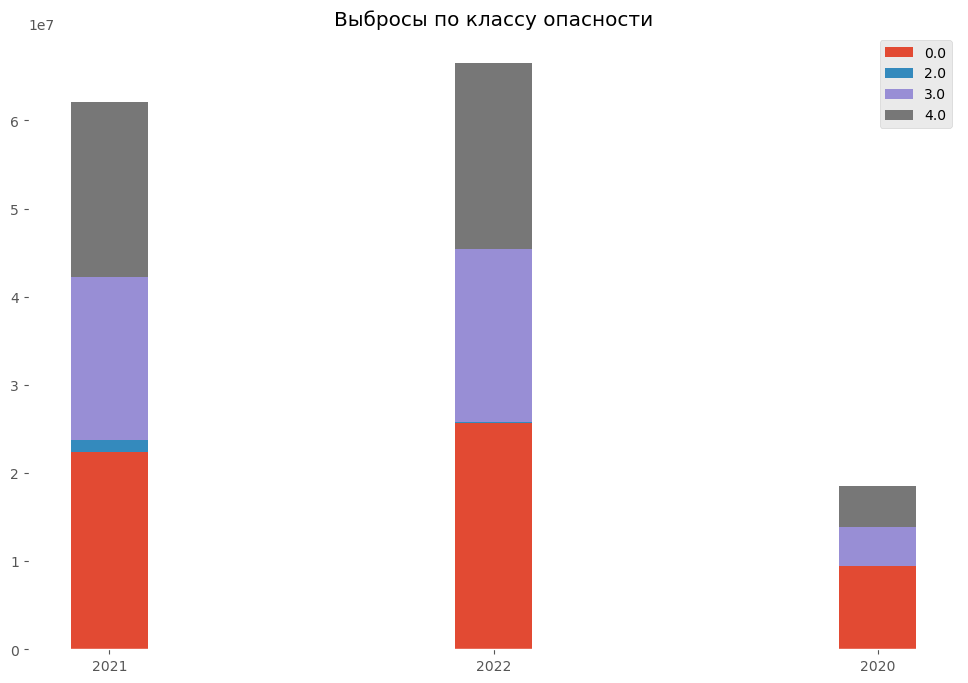

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
# data from https://allisonhorst.github.io/palmerpenguins/


width = 0.2
# cmap = plt.get_cmap('plasma')
fig, ax = plt.subplots()
# bottom = np.zeros(3)
N = 3
bottom = np.zeros(3)
# for year in data["Отчетный год"].unique():
for value in data["Класс опасности ЗВ"].unique():
    p = ax.bar( list(set(data["Отчетный год"].apply(str)))
                     ,data[data["Класс опасности ЗВ"]== value]["ДПНВОС, т\год"],\
                       width, bottom=bottom, label = value)
    bottom += list(data[data["Класс опасности ЗВ"]== value]["ДПНВОС, т\год"])
#     print(bottom)
ax.set_facecolor("white")
ax.legend(loc="upper right")
plt.title('Выбросы по классу опасности')
plt.show()   
# cl0 = data[data["Класс опасности ЗВ"]== 0.0]["ДПНВОС, т\год"]
# cl2 = data[data["Класс опасности ЗВ"]== 2.0]["ДПНВОС, т\год"]
# cl3 = data[data["Класс опасности ЗВ"]== 3.0]["ДПНВОС, т\год"]
# cl4 = data[data["Класс опасности ЗВ"]== 4.0]["ДПНВОС, т\год"]


# ind = np.arange(N)    # the x locations for the groups
# width = 0.35       # the width of the bars: can also be len(x) sequence
# bottom = 0
# p1 = plt.bar(ind, cl0, width)
# # p2 = plt.bar(ind, cl2, width, bottom= list(cl0))
# p3 = plt.bar(ind, cl3, width, bottom= )
# # p4 = plt.bar(ind, cl4, width,
# #              bottom= cl0 + cl2 + c14)

# plt.ylabel('Scores')
# plt.title('Scores by group and gender')
# plt.xticks(ind, ('2020', '2021', '2022'))
# plt.yticks(np.arange(0, 81, 10))
# plt.legend((p1[0], p2[0]), ('Men', 'Women'))



In [20]:
data  = dfclass.groupby(["Отчетный год"]).agg("sum") 
data = data.reset_index()
data.head(15)

,Отчетный год,Класс опасности ЗВ,"ДПНВОС, т\год","ПЭК, т\год"
0,2020,31624.0,7.937433e+07,3.968716e+07
1,2021,34815.0,8.093950e+07,4.046975e+07
2,2022,7732.0,2.006909e+07,1.003455e+07


In [21]:
data["ДПНВОС, т\год"]

0    7.937433e+07
1    8.093950e+07
2    2.006909e+07
Name: ДПНВОС, т\год, dtype: float64

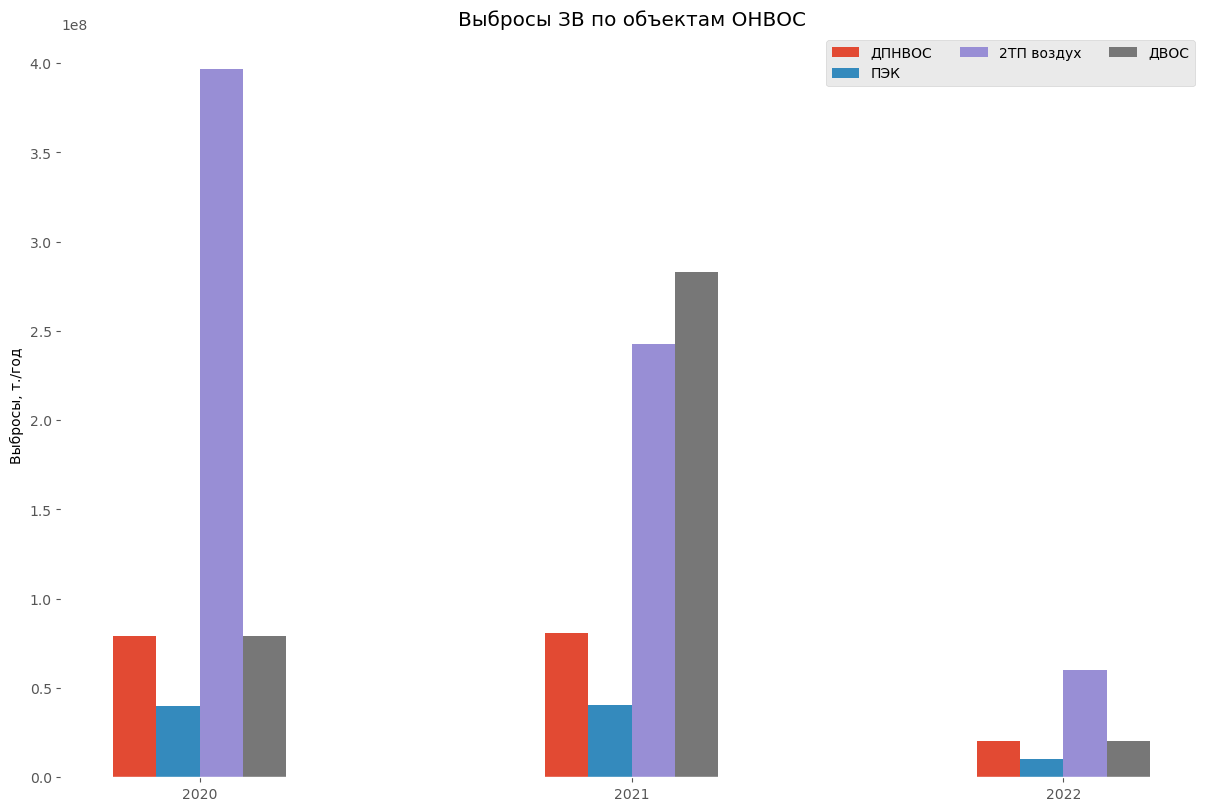

In [23]:
from random import randint

# species = ["2020", "2021", "2022"]
# penguin_means = {
#     'Bill Depth': (18.35, 18.43, 14.98),
#     'Bill Length': (38.79, 48.83, 47.50)
# }

x = np.arange(len(data["Отчетный год"]))  # the label locations
year = data["Отчетный год"].apply(str)
width = 0.1  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')


rects = ax.bar(data["Отчетный год"], data["ДПНВОС, т\год"], width, label = "ДПНВОС")
rects2 = ax.bar(data["Отчетный год"] + width, data["ПЭК, т\год"], width, label = "ПЭК")
rects3 = ax.bar(data["Отчетный год"] + width*2, data["ПЭК, т\год"].apply(lambda x: x*randint(2, 10)), width, label = "2ТП воздух")
rects4 = ax.bar(data["Отчетный год"] + width*3, data["ПЭК, т\год"].apply(lambda x: x*randint(2, 10)), width, label = "ДВОС")

ax.set_facecolor("white") 
    

ax.set_xticks(data["Отчетный год"]+ width*1.5, year)
ax.set_ylabel('Выбросы, т./год')
ax.set_title('Выбросы ЗВ по объектам ОНВОС')
# ax.set_xticks(x + width*, species)
ax.legend(loc='upper right', ncols=3)
# ax.set_ylim(0, 250)

plt.show()

## По Объектам 

In [24]:
df

,"ПЭК, т\год","ДПНВОС, т\год",Отчетный год,Класс опасности ЗВ,Наименование ЗВ,Код ОНВОС
0,411413.342392,822826.684784,2021,4.0,"Углеводороды предельные C1 - C5 (алканы, исклю...",03-0123-001907-П
1,406065.283500,812130.567000,2020,NaN,Сухой остаток,57-0159-002123-П
2,248024.421600,496048.843200,2020,NaN,Сухой остаток,80-0102-000139-П
3,248024.421600,496048.843200,2020,NaN,Сухой остаток,80-0102-000138-П
4,241492.880017,482985.760033,2022,4.0,Углерод оксид,61-0162-000059-П
...,...,...,...,...,...,...
33370,500.319922,1000.639843,2020,4.0,Взвешенные частицы РМ2.5,01-0222-003997-П
33371,500.319922,1000.639843,2020,4.0,Взвешенные частицы РМ2.5,01-0222-003981-П
33372,500.319922,1000.639843,2020,4.0,Взвешенные частицы РМ2.5,01-0222-003971-П
33373,500.190488,1000.380976,2021,4.0,Углерод оксид,71-0186-000505-П


In [25]:
dfnvos = df[["Отчетный год","Код ОНВОС", "Класс опасности ЗВ", "ДПНВОС, т\год", "ПЭК, т\год"]]
dfnvos = dfnvos[dfnvos["Отчетный год"] == 2022]
dfnvos["sum"] = dfnvos["ДПНВОС, т\год"] + dfnvos["ПЭК, т\год"]
dfnvos = dfnvos.sort_values(by=["sum"], ascending=False)
dfnvos = dfnvos.groupby(["Код ОНВОС", "Отчетный год"]).agg("sum")

dfnvos

,,Класс опасности ЗВ,"ДПНВОС, т\год","ПЭК, т\год",sum
Код ОНВОС,Отчетный год,,,,
18-0134-000417-П,2022,7.0,7157.000792,3578.500396,10735.501188
18-0134-001566-П,2022,3.0,2834.747920,1417.373960,4252.121880
18-0134-001567-П,2022,3.0,2834.747920,1417.373960,4252.121880
ШЗ-0130-000134-П,2022,0.0,26015.254500,13007.627250,39022.881750
03-0123-002068-П,2022,0.0,4078.819503,2039.409751,6118.229254
...,...,...,...,...,...
ШЗ-0130-000135-П,2022,0.0,26015.254500,13007.627250,39022.881750
ШЗ-0130-001349-П,2022,0.0,26015.254500,13007.627250,39022.881750
ШЛ-0123-003468-П,2022,0.0,4078.819503,2039.409751,6118.229254


In [26]:
dfnvos = dfnvos.reset_index()
dfnvos = dfnvos.head(30)
dfnvos.head(30)

,Код ОНВОС,Отчетный год,Класс опасности ЗВ,"ДПНВОС, т\год","ПЭК, т\год",sum
0,18-0134-000417-П,2022,7.0,7157.000792,3578.500396,10735.501188
1,18-0134-001566-П,2022,3.0,2834.747920,1417.373960,4252.121880
2,18-0134-001567-П,2022,3.0,2834.747920,1417.373960,4252.121880
3,ШЗ-0130-000134-П,2022,0.0,26015.254500,13007.627250,39022.881750
4,03-0123-002068-П,2022,0.0,4078.819503,2039.409751,6118.229254
5,03-0123-002070-П,2022,0.0,4078.819503,2039.409751,6118.229254
6,03-0123-002072-П,2022,0.0,4078.819503,2039.409751,6118.229254
7,03-0123-002073-П,2022,0.0,4078.819503,2039.409751,6118.229254
8,03-0123-002074-П,2022,0.0,4078.819503,2039.409751,6118.229254
9,03-0123-002076-П,2022,0.0,4078.819503,2039.409751,6118.229254


1. Изменение показателя по годам. 
Выбор: вещество (не обязательно), в случае если вещество не выбрано показывается общаяя сумма выброса/сброса по всем веществам объекта.
Горизонталь: год. 
Вертикаль: объем выброса выбранного вещества или суммы веществ по объекту.
Отобразить выбросы/сбросы от всех видов отчетности/деклараций на 1 графике (например разными цветами)

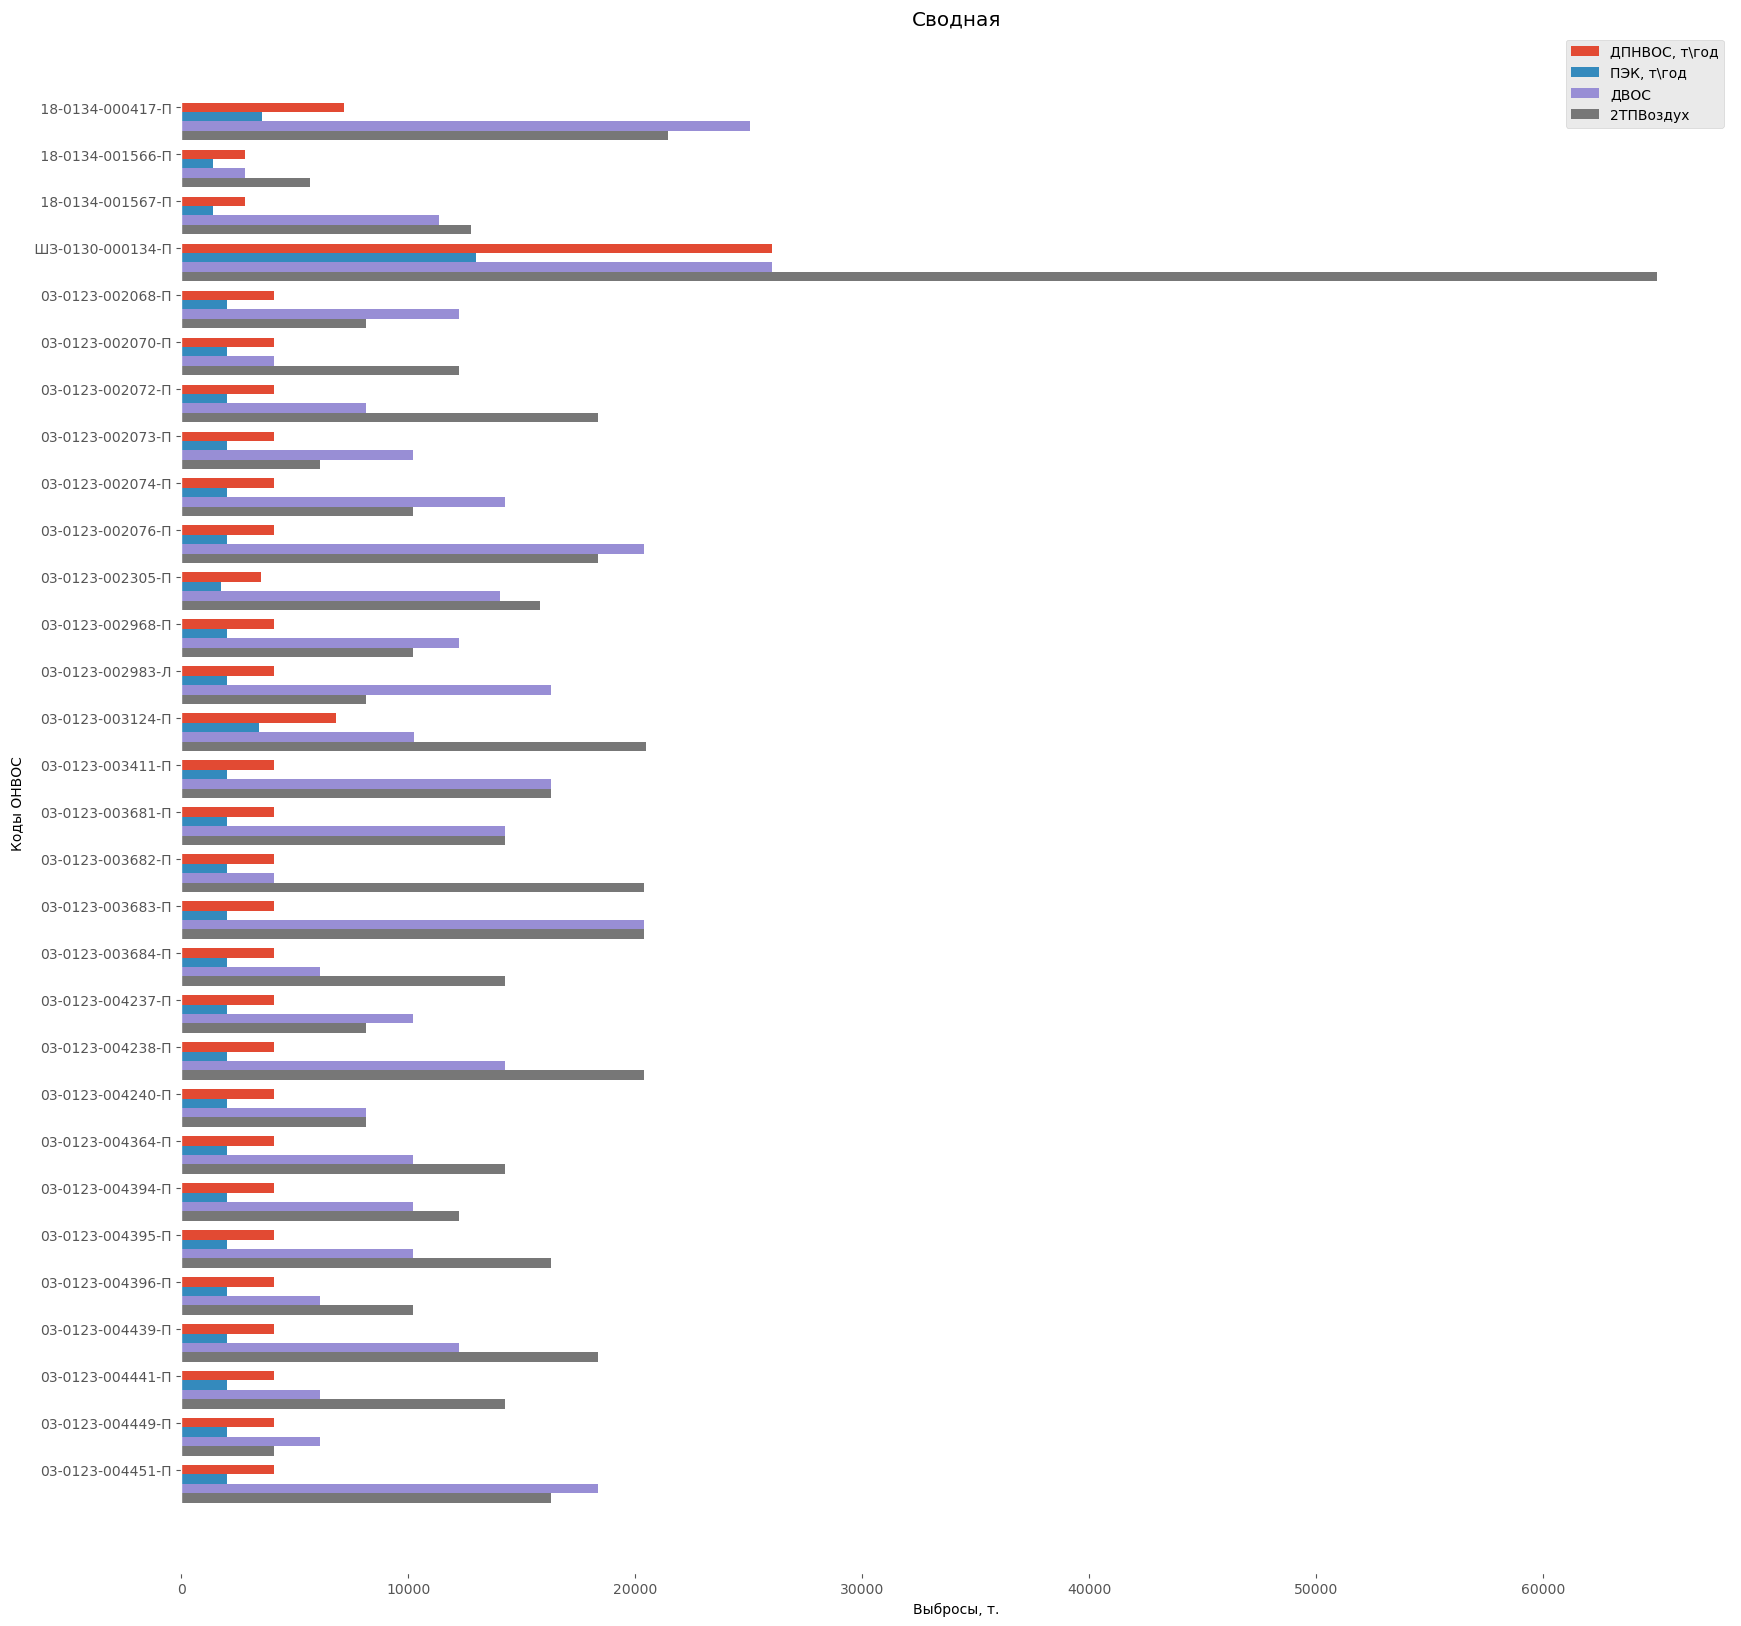

In [31]:
from random import randint
fig = plt.figure(figsize = (20, 20))

ax = plt.gca()
ax2 = plt.gca()
ax3 = plt.gca()
ax4 = plt.gca()

# Example data
nvos = dfnvos["Код ОНВОС"]
y_pos = np.arange(len(nvos))
performance = dfnvos["ДПНВОС, т\год"]
pek = dfnvos["ПЭК, т\год"]
dekl = dfnvos["ПЭК, т\год"].apply(lambda x: x*randint(2, 10))
rep = dfnvos["ПЭК, т\год"].apply(lambda x: x*randint(2, 10))
width = 0.2
# amount_substance = dfnvos["Количество_веществ"]
# amount_emission_source = dfokved["Количество_источников"]
# ax2.barh(y_pos, amount_substance, align='center', label="Количество_веществ")
ax.barh(y_pos, performance, height=0.2, align='center', label="ДПНВОС, т\год")
ax2.barh(y_pos + width, pek, height=0.2, align='center', label="ПЭК, т\год")
ax3.barh(y_pos + width*2, dekl, height=0.2, align='center', label="ДВОС")
ax4.barh(y_pos + width*3, rep, height=0.2, align='center', label="2ТПВоздух")

# ax3.barh(y_pos, amount_emission_source, align='center')
ax.set_yticks(y_pos, labels=nvos)
# ax.set_xticks(performance, labels=None)
# ax2.set_xticks(amount_substance)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel("Выбросы, т.")
ax.set_ylabel('Коды ОНВОС')
ax.set_title('Сводная')
ax.legend()
ax.set_facecolor("white") 
plt.show()

2. топ (10-15 строк) объема выбрасываемых/cбрасываемых ЗВ (по всем видам воздействия) в разбивке по объектам НВОС в 
сравнении с выбросами/сбросами в принятой отчетности 2-ТП (воздух), ДПНВОС, ДВОС, ПЭК

In [ ]:
df

In [32]:
dfnvos = df
dfnvos = dfnvos[dfnvos["Отчетный год"] == 2022]
dfnvos["sum"] = dfnvos["ДПНВОС, т\год"] + dfnvos["ПЭК, т\год"]
dfnvos = dfnvos.sort_values(by=["sum"], ascending=False)
dfnvos = dfnvos.groupby(["Код ОНВОС", "Наименование ЗВ"]).agg("sum")
dfnvos = dfnvos.sort_values(by=["sum"], ascending=False)
dfnvos

,,"ПЭК, т\год","ДПНВОС, т\год",Отчетный год,Класс опасности ЗВ,sum
Код ОНВОС,Наименование ЗВ,,,,,
61-0162-000059-П,Углерод оксид,241492.880017,482985.760033,2022,4.0,724478.640050
42-0148-001511-П,Углерод оксид,100805.693473,201611.386946,2022,4.0,302417.080418
42-0148-001512-П,Углерод оксид,100805.693473,201611.386946,2022,4.0,302417.080418
42-0148-001504-П,Углерод оксид,100805.693473,201611.386946,2022,4.0,302417.080418
42-0148-001519-П,Углерод оксид,100805.693473,201611.386946,2022,4.0,302417.080418
...,...,...,...,...,...,...
18-0134-000183-П,Азот (II) оксид,508.566699,1017.133398,2022,3.0,1525.700097
18-0234-001272-П,Азот (II) оксид,508.566699,1017.133398,2022,3.0,1525.700097
22-0152-002273-П,Этанол,503.262945,1006.525891,2022,4.0,1509.788836


In [14]:
dfzv = dfnvos.groupby(["Наименование ЗВ"]).agg("sum")
dfzv = dfzv.sort_values(by=["sum"], ascending=False)

KeyError: 'Наименование ЗВ'

In [ ]:
dfzv = dfzv.reset_index()
dfzv = dfzv.head(15)

In [ ]:
dfzv

In [ ]:
z = np.abs(stats.zscore(df['column_name']))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
data_clean = df['column_name'][(z<3).all(axis=1)]

#find how many rows are left in the dataframe 
data_clean.head()